In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn import preprocessing

Loading the datasets from the clean files.

In [2]:
Irisdata=pd.read_csv('iris_clean.csv')
LoanPredata=pd.read_csv('Loanprediction.csv')
Incomedata=pd.read_csv('Incomeprediction.csv')
CarEvadata=pd.read_csv('Carevaluation.csv')
arraydataset=[('Iris_Data',Irisdata),('Loan_Data',LoanPredata),('Income_Data',Incomedata),('Car_Evaluation_Data',CarEvadata)]

Scaling the features such that they have equal mean and equal spread.

In [3]:
for _,data in arraydataset:
    data[data.columns[0:-1]] = preprocessing.scale(data[data.columns[0:-1]])

A class for models consisting of mean square and standard (cross-entropy) cost function. The activation function used for both models is the same sigmoid function.

In [4]:
class Models:
    """
    Class for implementing models using mean square and cross-entropy cost function
    
    Arguments:
    mean -- If set True then it will use mean square cost functions and vice-versa.
    
    """
    
    def __init__(self,mean=True):
        self.mean=mean
    
    def sigmoid(self,x):
        """
        A function for calculating sigmoid function.
    
        Arguments:
        x -- Input array. 
    
        Returns:
        f_x -- Sigmoid function of input array x.
        """

        f_x = 1/(1+np.exp(-x))
        return f_x
  
    def fit(self, X, Y, w=[],b=[],max_iterations = 100, learning_rate = 0.1,tolerance=0):
        """
        Function for fitting the data with given labelled classes.
    
        Arguments:
        X -- Input data, matrix containing features in columns and examples in rows. 
        Y -- Labelled classes for the input data (X).
        w -- Initial weights. 
        b -- Initial bias.
        max_interations -- Maximum number of iterations of gradient descent before stopping.
        learning_rate -- Learning rate for gradient descent.
        tolerance --  Tolerance for stopping criteria.
        
        Returns:
        coefs -- Coefficients of the features after the max_iterations or if tolerance is reached.
        cost -- Array containing the costs of at every 100 steps of gradient descent iteration.
        
        """
  
        if w==[]:
            #randomly intialising coefficients if they are not specified.
            self.w = np.random.rand(1,X.shape[1])*0.01
            self.b = 0.0
        else:
            self.w=w
            self.b=b
        ##number of examples are in the rows.
        m = X.shape[0]
    
        ##Intialising J_old for tolerance criteria and cost array for plotting later.
        J_old=1e7
        cost = []
        
        for i in range(max_iterations):

            #activation function and costfunction.
            A = self.sigmoid(np.dot(self.w,X.T)+self.b)
            if self.mean:
                costfunction = (1/m)*(np.sum((A.T-Y)*(A.T-Y),axis=0))
            else:
                costfunction = -(1/m)*(np.sum(np.dot(np.log(A),Y)+np.dot(np.log(1-A),1-Y),axis=0))


            #gradients.
            if self.mean:
                A_pref = 2*(A-Y.T)*A*(1-A)
                self.dw = np.dot(A_pref,X)/m
                self.db = np.sum(A_pref,axis=1)/m
            else:
                self.dw = np.dot((A-Y.T),X)/m
                self.db = np.sum((A-Y.T),axis=1)/m
                
            ##break if changes in the cost function are below the tolerance.
            if np.abs(J_old-costfunction)<tolerance:
                break

            #updating coefficient.
            self.w -= learning_rate*self.dw
            self.b -= learning_rate*self.db
            
            #storing the cost for plotting later.
            if i % 100 == 0:
                cost.append(costfunction)
            J_old=costfunction

        coefs = {"w": self.w,
                  "b": self.b}


        return coefs, cost
    
    def predict(self, X):
        """
        Returns the predictions after the fit of model.
    
        Arguments:
        x -- Input array. 
    
        Returns:
        Y_out -- Predictions of the model.
        
        """

        A = self.sigmoid(np.dot(self.w,X.T)+self.b)
        Y_out = (A>0.5)
        return Y_out.T



An object of Models with the mean square cost function. First the fitting is done with tolerance of $10^{-6}$ and then with zero tolerance which implies that fitter runs till the maximum number of iterations.

In [5]:
costsarray=[]
LRModelMean=Models(mean=True)
for names, data in arraydataset:
    X = data[data.columns[:-1]].values
    Y = data[data.columns[-1]].values
    Y = Y.reshape(Y.shape[0],1)
    tic = time.process_time()
    coefs, costs = LRModelMean.fit(X,Y, max_iterations = 5000, learning_rate = .1, tolerance=1e-6)
    toc = time.process_time()
    prediction = LRModelMean.predict(X)
    costsarray.append(costs)
    accuracy=accuracy_score(prediction,Y)
    print(' {} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 1e-6\n".format(1000*(toc - tic)))
    
    tic = time.process_time()
    LRModelMean.fit(X,Y, max_iterations = 5000, learning_rate = .1)
    toc = time.process_time()
    prediction = LRModelMean.predict(X)
    accuracy=accuracy_score(prediction,Y)
    print(' {} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 0\n".format(1000*(toc - tic)))
    print('----------------------------------------------------------------')
    

 Iris_Data fitted with accuracy = 0.97
Computation time = 430.20178899999985ms with tolerance = 1e-6

 Iris_Data fitted with accuracy = 0.97
Computation time = 612.514902ms with tolerance = 0

----------------------------------------------------------------
 Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 86.23214200000007ms with tolerance = 1e-6

 Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 655.5143360000004ms with tolerance = 0

----------------------------------------------------------------
 Income_Data fitted with accuracy = 0.8285372070882344
Computation time = 49530.028414ms with tolerance = 1e-6

 Income_Data fitted with accuracy = 0.8304720370995977
Computation time = 122680.625442ms with tolerance = 0

----------------------------------------------------------------
 Car_Evaluation_Data fitted with accuracy = 0.765625
Computation time = 321.82828100002325ms with tolerance = 1e-6

 Car_Evaluation_Data fitted with accuracy = 0.7

All datasets fit with in the tolerance limit of $10^{-6}$ with in a second of the computation time except Income_Data, because it has more number of features and number of examples.

Text(0, 0.5, 'Cost Function')

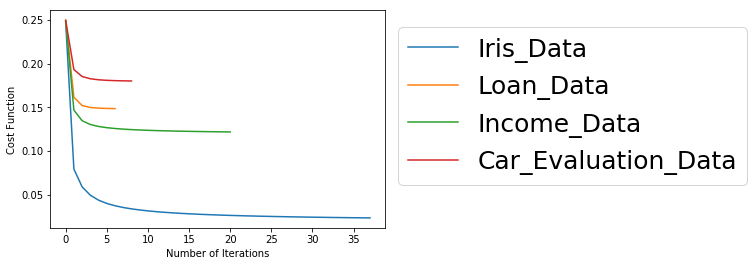

In [6]:
plt.plot(costsarray[0],label=arraydataset[0][0])
plt.plot(costsarray[1],label=arraydataset[1][0])
plt.plot(costsarray[2],label=arraydataset[2][0])
plt.plot(costsarray[3],label=arraydataset[3][0])
plt.legend(bbox_to_anchor=(1,0.98),loc=2,fontsize=25)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')

An object of models with standard cost function (cross-entropy) with same tolerance and maximum iteration number.

In [7]:
LRModelstandard=Models(mean=False)
costsarraystan=[]
for names, data in arraydataset:
    X = data[data.columns[:-1]]
    Y = data[data.columns[-1]]
    Y = Y.values.reshape(Y.shape[0],1)
    tic = time.process_time()
    coefs, costs = LRModelstandard.fit(X,Y, max_iterations = 5000, learning_rate = 0.1, tolerance=1e-6)
    toc = time.process_time()
    prediction = LRModelstandard.predict(X)
    costsarraystan.append(costs)
    accuracy=accuracy_score(prediction,Y)
    print('{} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 1e-6\n".format(1000*(toc - tic)))
    
    tic = time.process_time()
    LRModelstandard.fit(X,Y, max_iterations = 5000, learning_rate = .1)
    toc = time.process_time()
    prediction = LRModelstandard.predict(X)
    accuracy=accuracy_score(prediction,Y)
    print(' {} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 0\n".format(1000*(toc - tic)))
    print('----------------------------------------------------------------')



Iris_Data fitted with accuracy = 0.97
Computation time = 5822.138319999994ms with tolerance = 1e-6

 Iris_Data fitted with accuracy = 0.97
Computation time = 6561.506914999995ms with tolerance = 0

----------------------------------------------------------------
Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 529.9333020000176ms with tolerance = 1e-6

 Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 7735.791637999995ms with tolerance = 0

----------------------------------------------------------------
Income_Data fitted with accuracy = 0.8241147384908326
Computation time = 93681.090098ms with tolerance = 1e-6

 Income_Data fitted with accuracy = 0.8246675470655078
Computation time = 261571.14755000002ms with tolerance = 0

----------------------------------------------------------------
Car_Evaluation_Data fitted with accuracy = 0.7578125
Computation time = 603.3943439999803ms with tolerance = 1e-6

 Car_Evaluation_Data fitted with accurac

Fitting accuracy for **standard cost function** is almost the same with **mean square cost function**. However, the **computation time** for this function is almost 5-10 times in comparison with **mean square cost function**. A reason for this is that calculating log function is more expensive in comparison with the square function.

Text(0, 0.5, 'Cost Function')

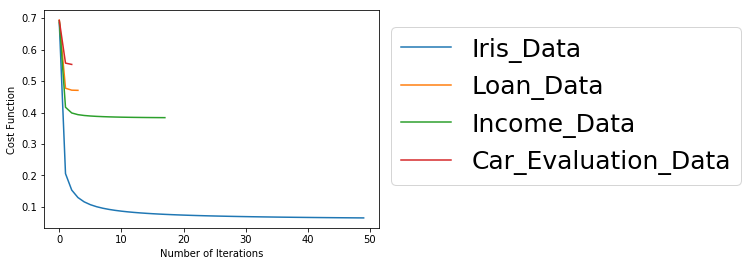

In [8]:
plt.plot(costsarraystan[0],label=arraydataset[0][0])
plt.plot(costsarraystan[1],label=arraydataset[1][0])
plt.plot(costsarraystan[2],label=arraydataset[2][0])
plt.plot(costsarraystan[3],label=arraydataset[3][0])
plt.legend(bbox_to_anchor=(1,0.98),loc=2,fontsize=25)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')

Here, we use the logistic regression from the standard skilearn libary of python to be sure if the self-customized classes are working good enough. 

In [9]:
LR=LogisticRegression(solver='liblinear', C = 1e7)

In [10]:
for names, data in arraydataset:
    X = data[data.columns[:-1]]
    Y = data[data.columns[-1]]
    LR.fit(X,Y)
    prediction = LR.predict(X)
    accuracy=accuracy_score(prediction,Y)
    print('{} fitted with accuracy = {}\n'.format(names,accuracy))


Iris_Data fitted with accuracy = 0.98

Loan_Data fitted with accuracy = 0.8110749185667753

Income_Data fitted with accuracy = 0.824513989128098

Car_Evaluation_Data fitted with accuracy = 0.7578125



The comparison of accuracies suggests that **Models class** is working fine. Therefore, it seems that at least for these datasets the mean square cost function fits at least equally fine. Furthermore, it does the fitting faster than cross-entropy function. It might be that it is more likely to get stuck in an local minimum with the mean square cost function.<br>
To check this, we can increase the cost to see if another minimum is observed while the cost increases.

In [11]:
class IncreaseCost(Models):
    """
    Class for implementing inverse of gradient descent using mean square and cross-entropy cost function.
    Since this class uses almost similar functions to "Models" except fit function, 
    we inherit "Models" class here.
    
    """
  
    def Increase(self, X, Y, num_iterations = 100, learning_rate = 0.1):
        """
        A function for increasing the cost function.
    
        Arguments:
        X -- Input data, matrix containing features in columns and examples in rows. 
        Y -- Labelled classes for the input data (X).
        num_interations -- Number of iterations of inverse gradient descent before stopping.
        learning_rate -- Learning rate for inverse gradient descent.
        
        Returns:
        coefs -- Coefficients of the features after the num_iterations.
        cost -- Array containing the costs of at every 100 steps of inverse gradient descent iteration.
        """

        self.w = np.random.rand(1,X.shape[1])*0.01
        self.b = 0.0
        m = X.shape[0]
        cost = []

        for i in range(num_iterations):

            A = self.sigmoid(np.dot(self.w,X.T)+self.b)
            if self.mean:
                costfunction = (1/m)*(np.sum((A.T-Y)*(A.T-Y),axis=0))
            else:
                costfunction = -(1/m)*(np.sum(np.dot(np.log(A),Y)+np.dot(np.log(1-A),1-Y),axis=0))


            if self.mean:
                A_pref = 2*(A-Y.T)*A*(1-A)
                self.dw = np.dot(A_pref,X)/m
                self.db = np.sum(A_pref,axis=1)/m
            else:
                self.dw = np.dot((A-Y.T),X)/m
                self.db = np.sum((A-Y.T),axis=1)/m

            self.w += learning_rate*self.dw
            self.b += learning_rate*self.db
 
            if i % 100 == 0:
                cost.append(costfunction)

        coefs = {"w": self.w,
                  "b": self.b}


        return coefs, cost


Let's increase the cost using the mean square cost function.

In [12]:
MeanCost=IncreaseCost(mean=True)
costsarray=[]
coeffsarraymean=[]
for names,data in arraydataset:
    X = data[data.columns[:-1]].values
    Y = data[data.columns[-1]].values
    Y = Y.reshape(Y.shape[0],1)
    coefs, costs = MeanCost.Increase(X,Y, num_iterations = 5000, learning_rate = .01)
    costsarray.append(costs)
    coeffsarraymean.append(coefs)

Text(0, 0.5, 'Cost Function')

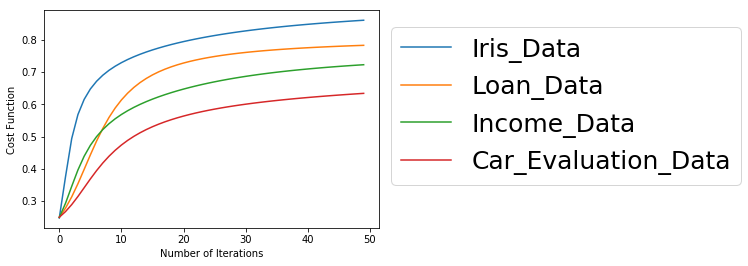

In [13]:
plt.plot(costsarray[0],label=arraydataset[0][0])
plt.plot(costsarray[1],label=arraydataset[1][0])
plt.plot(costsarray[2],label=arraydataset[2][0])
plt.plot(costsarray[3],label=arraydataset[3][0])
plt.legend(bbox_to_anchor=(1,0.98),loc=2,fontsize=25)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')

There does not seem to be any minimum in the cost function. However, let's compare with the cross-entropy function.

In [14]:
StandardCost=IncreaseCost(mean=False)
costsarray=[]
coeffsarraystandard=[]
for names,data in arraydataset:
    X = data[data.columns[:-1]].values
    Y = data[data.columns[-1]].values
    Y = Y.reshape(Y.shape[0],1)
    coefs, costs = StandardCost.Increase(X,Y, num_iterations = 5000, learning_rate = .01)
    costsarray.append(costs)
    coeffsarraystandard.append(coefs)

Text(0, 0.5, 'Cost Function')

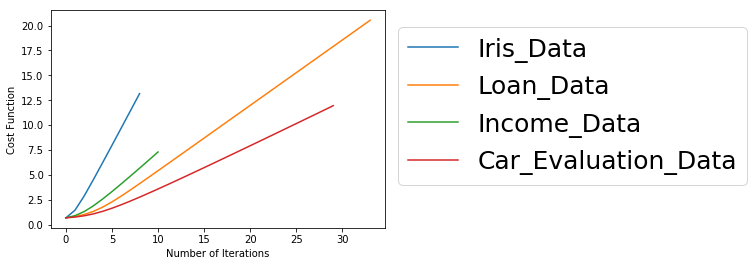

In [15]:
plt.plot(costsarray[0],label=arraydataset[0][0])
plt.plot(costsarray[1],label=arraydataset[1][0])
plt.plot(costsarray[2],label=arraydataset[2][0])
plt.plot(costsarray[3],label=arraydataset[3][0])
plt.legend(bbox_to_anchor=(1,0.98),loc=2,fontsize=25)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')

Here, the advantage of cross-entropy function can be seen clearly. Here, the slope of the cost function has almost constant magnitude everywhere. In contrast, in the case of mean squared function the magnitude is slope is quite low far away from minimum. If we coincidently initialized our weights far away from the minimum, then, the gradient descent will work slower in comparison with standard function.<br>
Let's see how long does it take both of these cost function to minimize the cost from these weights as starting points.

In [16]:
LRModelMean=Models(mean=True)
costarraymean=[]
for index, (names, data) in enumerate(arraydataset):
    X = data[data.columns[:-1]]
    Y = data[data.columns[-1]]
    Y = Y.values.reshape(Y.shape[0],1)
    tic = time.process_time()
    _, costs = LRModelMean.fit(X,Y,w=coeffsarraymean[index]['w'], b=coeffsarraymean[index]['b'], max_iterations = 5000, learning_rate = 0.1, tolerance=1e-6)
    toc = time.process_time()
    costarraymean.append(costs)
    prediction = LRModelMean.predict(X)
    accuracy=accuracy_score(prediction,Y)
    print('{} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 1e-6\n".format(1000*(toc - tic)))


Iris_Data fitted with accuracy = 0.97
Computation time = 5512.307935000081ms with tolerance = 1e-6

Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 1839.4584110000096ms with tolerance = 1e-6

Income_Data fitted with accuracy = 0.8285372070882344
Computation time = 85741.36700999986ms with tolerance = 1e-6

Car_Evaluation_Data fitted with accuracy = 0.765625
Computation time = 1970.5528709998816ms with tolerance = 1e-6



Now for cross entropy cost function.

In [17]:
LRModelStand=Models(mean=False)
costarrayStan=[]
for index, (names, data) in enumerate(arraydataset):
    X = data[data.columns[:-1]]
    Y = data[data.columns[-1]]
    Y = Y.values.reshape(Y.shape[0],1)
    tic = time.process_time()
    _, costs = LRModelStand.fit(X,Y,w=coeffsarraystandard[index]['w'], b=coeffsarraystandard[index]['b'], max_iterations = 5000, learning_rate = 0.1, tolerance=1e-6)
    toc = time.process_time()
    costarrayStan.append(costs)
    prediction = LRModelStand.predict(X)
    accuracy=accuracy_score(prediction,Y)
    print('{} fitted with accuracy = {}'.format(names,accuracy))
    print("Computation time = {}ms with tolerance = 1e-6\n".format(1000*(toc - tic)))


Iris_Data fitted with accuracy = 0.97
Computation time = 5672.907343000134ms with tolerance = 1e-6

Loan_Data fitted with accuracy = 0.8110749185667753
Computation time = 1198.805171999993ms with tolerance = 1e-6

Income_Data fitted with accuracy = 0.8241147384908326
Computation time = 127870.21667799991ms with tolerance = 1e-6

Car_Evaluation_Data fitted with accuracy = 0.7578125
Computation time = 1091.3999899998998ms with tolerance = 1e-6



Here, at least for Loan_Data and Car_Evaluation_Data cross-entropy function works better. 